### Predicting Song Rank based on its audio features

In [67]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import pandas as pd
import seaborn as sns 
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
%matplotlib inline

In [2]:
df = pd.read_csv('2018.csv')

In [3]:
df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,Rank
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,3.316217,4,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,2.776767,4,2
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,3.635783,4,3
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,3.690667,4,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,3.632083,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null int64
loudness            100 non-null float64
mode                100 non-null int64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_min        100 non-null float64
time_signature      100 non-null int64
Rank                100 non-null int64
dtypes: float64(10), int64(4), object(3)
memory usage: 13.4+ KB


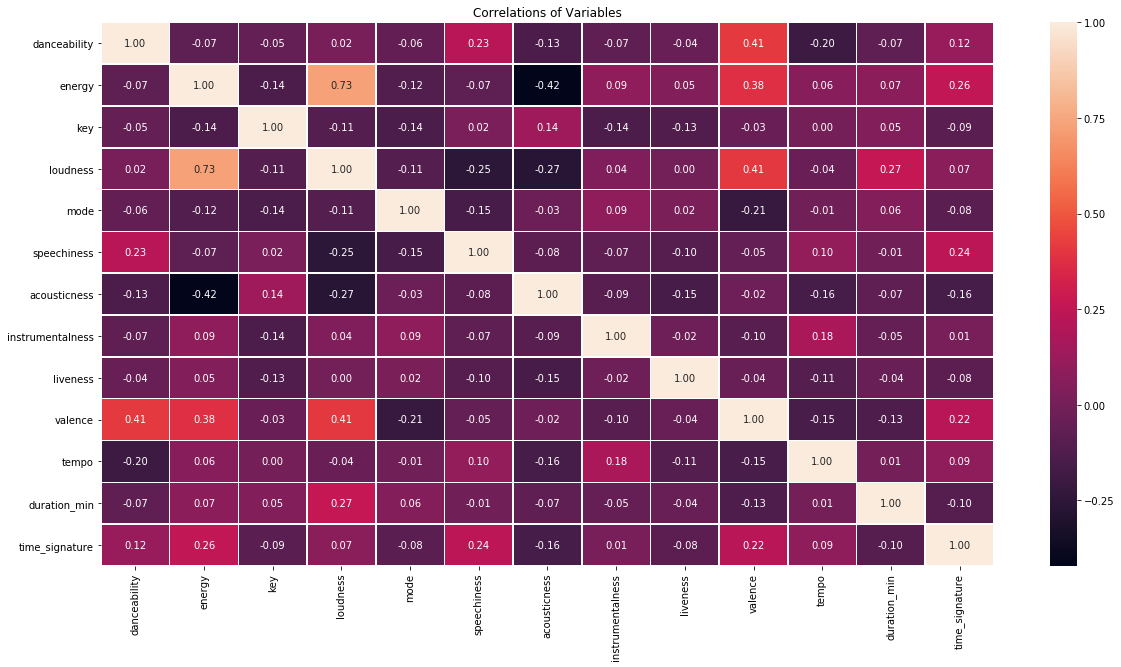

In [5]:
#Finding the correlation between audio features

f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df.iloc[:,3:16].corr(),annot=True,linewidth=.5,fmt=".2f",ax=ax)
plt.title("Correlations of Variables")
plt.show()

#### From the above correlation matrix we can see that energy and loudness are highly correlated, means if the loudness of a track increases then chances of it being energetic are quite higher.

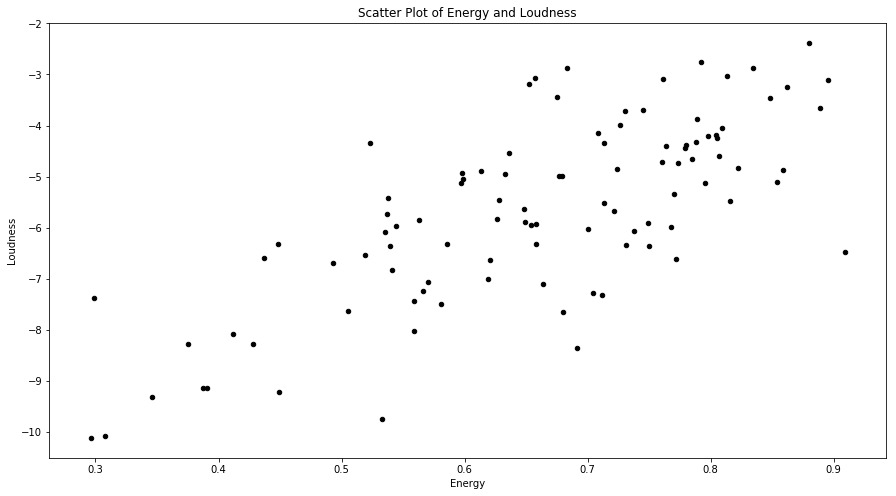

In [6]:
# Creating a scatter plot between loudness and energy

plt.rcParams['axes.facecolor'] = 'w'
df.plot(kind="scatter",x="energy",y="loudness",color="black",figsize=(15,8))
plt.title("Scatter Plot of Energy and Loudness")
plt.xlabel("Energy")
plt.ylabel("Loudness")
plt.show()

#### Now, we look at the which artist's songs are in our spotify tracks.

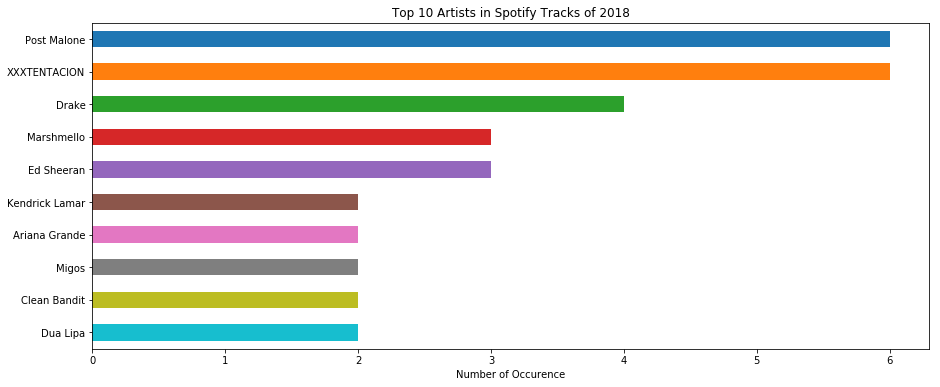

In [7]:
#Firstly, we need to count the values after that we select the top 10 numbers and plot the bar graph.

df['artists'].value_counts()[:10].plot(kind='barh',figsize=(15,6))
plt.title("Top 10 Artists in Spotify Tracks of 2018")
plt.xlabel("Number of Occurence")
plt.gca().invert_yaxis() # inverted the y axis.
plt.show()

# We see that Post Malone and XXTENTACION is the most seeing in the tracks.

#### Distribution of audio features

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Liveness Distribution')

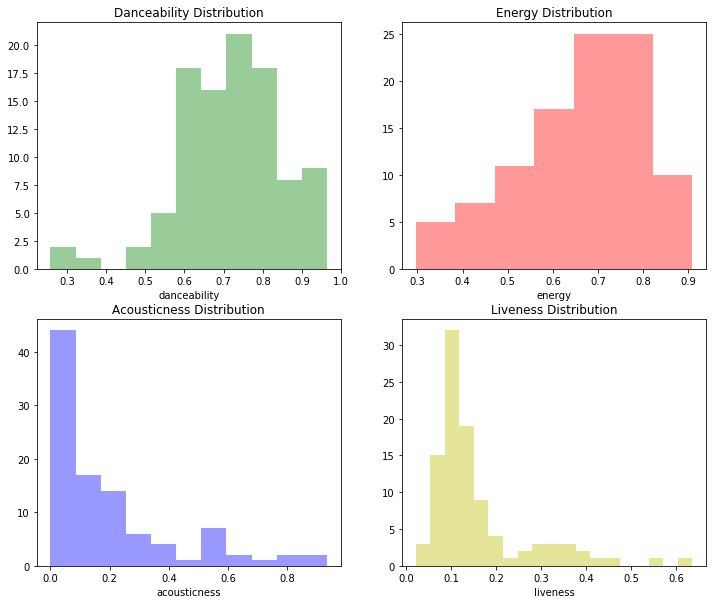

In [8]:


#Setup matplotlib figure
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

#Graph danceability
sns.distplot(df.danceability, kde=False, color="g", ax=axes[0][0]).set_title('Danceability Distribution')

#Graph energy
sns.distplot(df.energy, kde=False, color="r", ax=axes[0][1]).set_title('Energy Distribution')

#Graph energy
sns.distplot(df.acousticness, kde=False, color="b", ax=axes[1][0]).set_title('Acousticness Distribution')

#Liveness energy
sns.distplot(df.liveness, kde=False, color="y", ax=axes[1][1]).set_title('Liveness Distribution')

Text(0.5, 1.0, 'Duration Distribution')

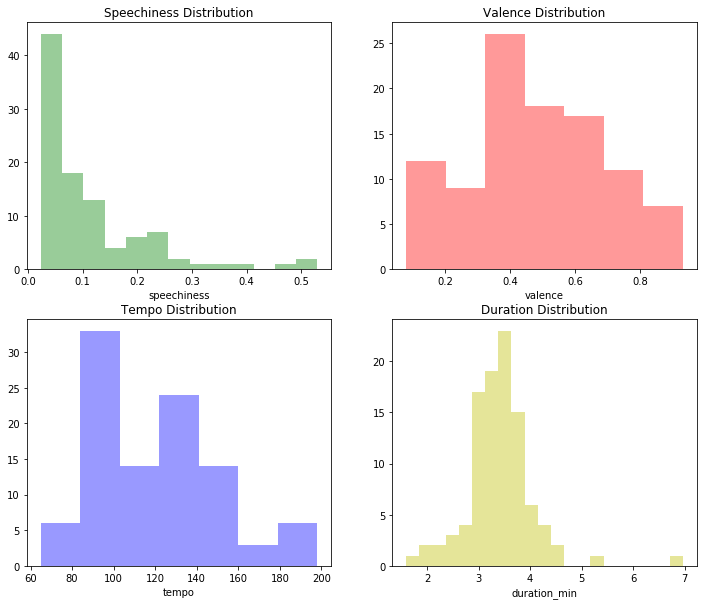

In [9]:
#Setup matplotlib figure
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))

#Graph energy
sns.distplot(df.speechiness, kde=False, color="g", ax=axes[0][0]).set_title('Speechiness Distribution')

#Graph energy
sns.distplot(df.valence, kde=False, color="r", ax=axes[0][1]).set_title('Valence Distribution')

#Liveness energy
sns.distplot(df.tempo, kde=False, color="b", ax=axes[1][0]).set_title('Tempo Distribution')

#Graph energy
sns.distplot(df.duration_min, kde=False, color="y", ax=axes[1][1]).set_title('Duration Distribution')

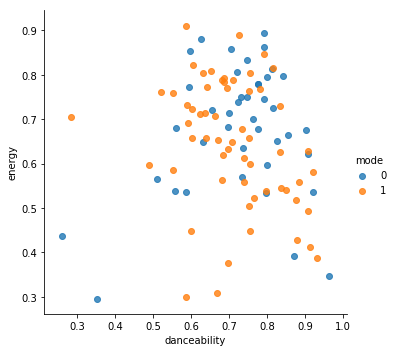

In [10]:
sns.lmplot(x='danceability', y='energy', data=df,
           fit_reg=False, # No regression line
           hue='mode')   # Color by evolution stage

#Mode indicates the modality (major or minor) of a track

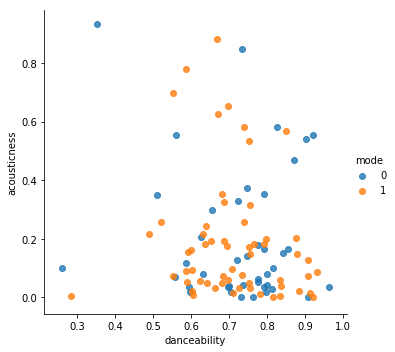

In [11]:
sns.lmplot(x='danceability', y='acousticness', data=df,
           fit_reg=False, # No regression line
           hue='mode')   # Color by evolution stage

#Mode indicates the modality (major or minor) of a track

#### Songs in which key are louder? In order to do so, we first need to convert the key variable from numeric to object

In [13]:
df["key_string"] = df["key"].replace({0: "C", 1: "C#", 2: "D", 3: "D#", 
                                                    4: "E", 5: "F", 6: "F#", 7: "G",
                                                    8: "G#", 9: "A", 10: "A#", 11: "B"})

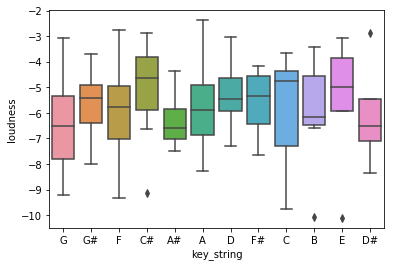

In [14]:
sns.boxplot(x="key_string", y="loudness", data=df)

##### It seems C# is the most frequently used key followed by C

### Model Creation

Our aim is to create a model which will predict the rank of a song based on its audio features.
Since our dependent variable is a Rank which is a ordinal in nature, we will be using ordinal logistic regression 
as a baseline model to predict the song rank.

#### Selecting Target and feature variables

In [15]:
x = df.iloc[:,3:-1].values
y = df.iloc[:,16].values

In [16]:
x

array([[  0.754     ,   0.449     ,   7.        , ...,   3.31621667,
          4.        ,   1.        ],
       [  0.74      ,   0.613     ,   8.        , ...,   2.77676667,
          4.        ,   2.        ],
       [  0.587     ,   0.535     ,   5.        , ...,   3.63578333,
          4.        ,   3.        ],
       ...,
       [  0.552     ,   0.76      ,   0.        , ...,   4.33333333,
          5.        ,  98.        ],
       [  0.258     ,   0.437     ,  11.        , ...,   3.98333333,
          4.        ,  99.        ],
       [  0.553     ,   0.586     ,  11.        , ...,   3.27288333,
          4.        , 100.        ]])

In [17]:
y

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

#### Pre-Req: Standardize the Dataset

First, lets rescale our features

In [25]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(x)
pd.DataFrame(scaled_X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.287854,-1.455314,0.456531,-1.997753,0.833616,-0.063162,-0.739184,-0.112147,3.543567,-0.621334,-1.491544,-0.156599,0.100504,-1.714816
1,0.180503,-0.319108,0.729903,0.450984,0.833616,0.282982,0.283383,0.159656,-0.317744,-0.055789,-1.566444,-0.969690,0.100504,-1.680173
2,-0.992691,-0.859498,-0.090213,-0.233147,-1.199593,-0.247772,-0.357995,-0.113440,-0.245738,-1.679294,1.394085,0.325071,0.100504,-1.645531
3,0.172835,-0.693224,0.729903,-1.319276,0.833616,0.013759,1.748092,-0.118343,-0.416751,-0.221552,0.705712,0.407795,0.100504,-1.610888
4,0.908957,-0.229043,-1.183701,-0.087840,0.833616,0.090680,-0.622280,-0.113859,2.139454,-0.655462,-1.007767,0.319494,0.100504,-1.576245


In [26]:
#Splitting the dataset ito training set and test set
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 0)

In [27]:
#For ordinal logistic regression we will import mord library

import mord

In [28]:
regressor = mord.OrdinalRidge()

In [29]:
#fitting the regressor to the traiing set

regressor.fit(x_train, y_train)

OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
#predicting the test set result

y_pred = regressor.predict(x_test)

In [32]:
y_pred

array([27., 87.,  4., 56., 76., 94., 17., 74., 55., 95., 54., 92., 78.,
       15.,  9., 31., 23., 25., 34., 10.])

In [33]:
y_test

array([27, 87,  3, 56, 76, 94, 17, 74, 55, 96, 54, 93, 79, 14,  8, 31, 23,
       25, 34,  9], dtype=int64)

In [34]:
y_final = y_test, y_pred

In [35]:
y_final

(array([27, 87,  3, 56, 76, 94, 17, 74, 55, 96, 54, 93, 79, 14,  8, 31, 23,
        25, 34,  9], dtype=int64),
 array([27., 87.,  4., 56., 76., 94., 17., 74., 55., 95., 54., 92., 78.,
        15.,  9., 31., 23., 25., 34., 10.]))

In [52]:
result = pd.DataFrame(list(y_final))
result = result.transpose()
result.columns = ["Actual Song Rank", "Predicted Song Rank"]
result.tail(6)

,Actual Song Rank,Predicted Song Rank
14,8.0,9.0
15,31.0,31.0
16,23.0,23.0
17,25.0,25.0
18,34.0,34.0
19,9.0,10.0


From the above result we can see that model is able to predict the song rank very accurately.
Since, we had limited data, we need to make sure we have not overfitted the model. Hence we will be using cross validation method to check the accuracy

#### Model tuning using K-Fold Cross Validation

In [65]:
# accurace of the baseline model using 5-cross validation method -
score = cross_val_score(regressor, x_train, y_train, cv = 10,scoring='accuracy')
score

array([0.375, 0.625, 0.625, 0.375, 0.375, 0.5  , 0.125, 0.625, 0.75 ,
       0.625])

In [66]:
print ('5-Cross Validation accuracy', (np.mean(score)), (np.std(score)))

5-Cross Validation accuracy 0.5 0.1767766952966369
